Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_v2_coco-dd69338a.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_v2_coco-dd69338a.pth
100%|██████████| 167M/167M [00:01<00:00, 97.6MB/s]


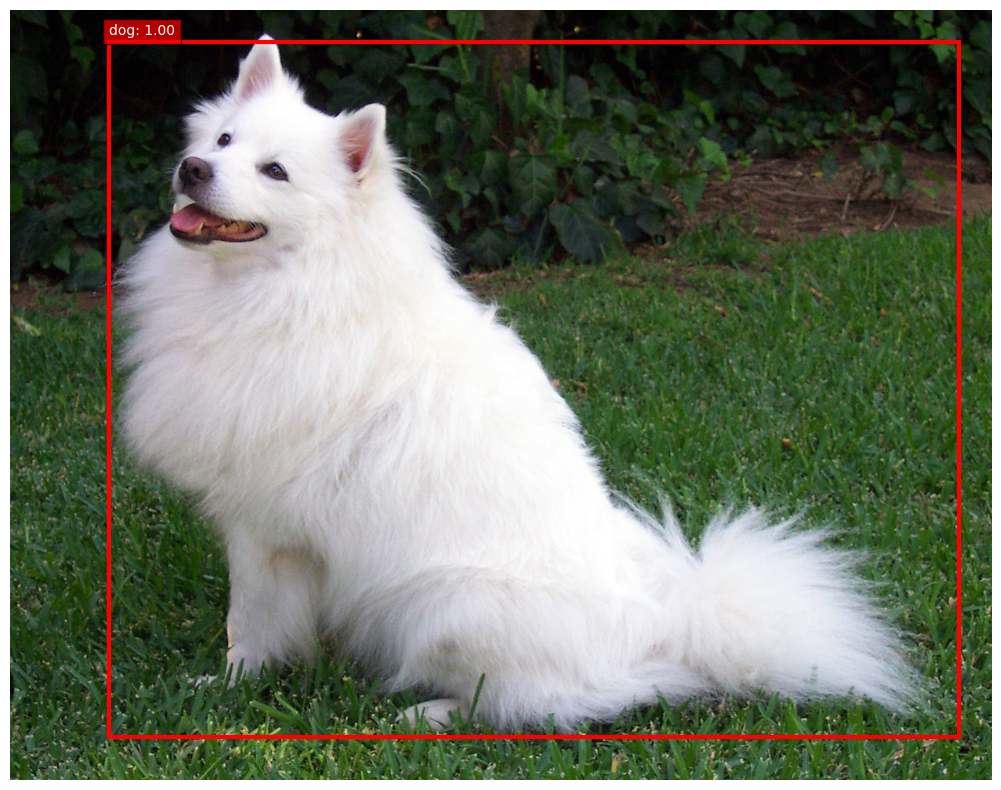

In [ ]:
# 1. Explain the architecture of Faster R-CNN and its components. Discuss the role of each component in the
# object detection pipeline.

import torch
import torchvision
from torchvision.models.detection import fasterrcnn_resnet50_fpn_v2, FasterRCNN_ResNet50_FPN_V2_Weights
from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt
from IPython.display import display
import numpy as np

def load_model_and_detect(url):
    # Load model
    weights = FasterRCNN_ResNet50_FPN_V2_Weights.DEFAULT
    model = fasterrcnn_resnet50_fpn_v2(weights=weights)
    model.eval()

    # Load and prepare image
    response = requests.get(url)
    image = Image.open(BytesIO(response.content))
    transform = torchvision.transforms.ToTensor()
    img_tensor = transform(image)

    # Get predictions
    with torch.no_grad():
        prediction = model([img_tensor])

    # Visualization
    plt.figure(figsize=(15, 10))
    plt.imshow(np.array(image))

    boxes = prediction[0]['boxes']
    scores = prediction[0]['scores']
    labels = prediction[0]['labels']

    # COCO classes
    COCO_CLASSES = ['__background__', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus',
                    'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'N/A', 'stop sign',
                    'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow',
                    'elephant', 'bear', 'zebra', 'giraffe', 'N/A', 'backpack', 'umbrella', 'N/A', 'N/A',
                    'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
                    'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket',
                    'bottle', 'N/A', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl',
                    'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
                    'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'N/A', 'dining table',
                    'N/A', 'N/A', 'toilet', 'N/A', 'tv', 'laptop', 'mouse', 'remote', 'keyboard',
                    'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'N/A', 'book',
                    'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']

    # Draw boxes for detections with score > 0.5
    for box, score, label in zip(boxes, scores, labels):
        if score > 0.5:
            x1, y1, x2, y2 = box.numpy()
            plt.gca().add_patch(plt.Rectangle((x1, y1), x2-x1, y2-y1,
                                          fill=False, color='red', linewidth=3))
            plt.text(x1, y1-10, f'{COCO_CLASSES[label]}: {score:.2f}',
                    color='white', bbox=dict(facecolor='red', alpha=0.7))

    plt.axis('off')
    display(plt.gcf())
    plt.close()

# Run detection on image
url = "https://raw.githubusercontent.com/pytorch/hub/master/images/dog.jpg"
load_model_and_detect(url)

**Architecture of Faster R-CNN**

Faster R-CNN is a deep learning-based object detection model that combines region proposal generation and object classification into a unified framework. It significantly improves the speed and accuracy of object detection tasks compared to its predecessors (e.g., R-CNN and Fast R-CNN).

**Key Components and Their Roles**

1. Backbone Network

 Purpose: Extract features from the input image.

 Description: A convolutional neural network (e.g., ResNet, VGG) is used as the backbone to extract a feature map from the input image. This feature map serves as the input for subsequent components.

 Role in Pipeline: Converts the input image into a lower-dimensional feature representation while retaining spatial information.

2. Region Proposal Network (RPN)

 Purpose: Generate region proposals that likely contain objects.

 Description: The RPN is a small neural network that slides over the feature map. It uses anchor boxes of different scales and aspect ratios to propose candidate regions. Each region is scored based on its likelihood of containing an object.

 Role in Pipeline: Quickly generates a set of potential object regions, reducing the number of regions the model needs to evaluate in detail.

3. RoI Pooling/Align Layer

 Purpose: Extract fixed-size feature maps from the variable-sized region proposals.

 Description: Region proposals from the RPN are mapped onto the feature map using RoI pooling or RoI Align. This step ensures that each proposal has a consistent size for further processing.

 Role in Pipeline: Bridges the gap between region proposals of varying sizes and the fully connected layers of the network.

4. Fully Connected Layers (Head Network)

 Purpose: Classify objects and refine bounding box predictions.

 Description: The fixed-size feature maps are passed through fully connected layers. The network outputs:
 - Class probabilities (e.g., whether the region contains a car, person, etc.).

 - Refined bounding box coordinates for better localization.

 Role in Pipeline: Provides the final object classifications and precise bounding box adjustments.

5. Loss Function

 Purpose: Train the network by optimizing its predictions.

 Description: Faster R-CNN uses a multi-task loss function:
 - Classification Loss: Measures the accuracy of class predictions.

 - Regression Loss: Measures the accuracy of bounding box coordinates.

 Role in Pipeline: Guides the training process by minimizing errors in both classification and localization.

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth
100%|██████████| 160M/160M [00:01<00:00, 143MB/s]


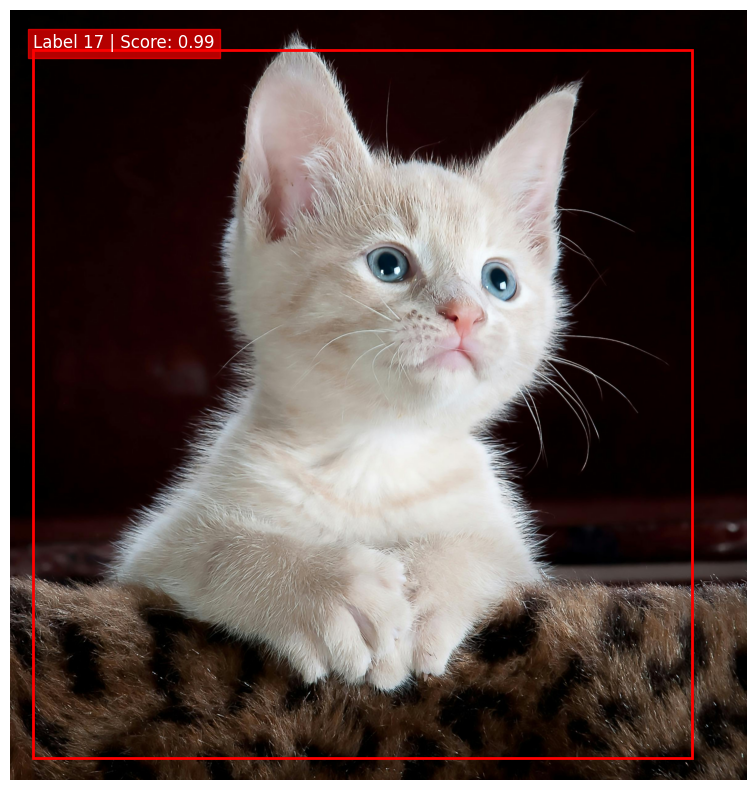

In [ ]:
# 2. Discuss the advantages of using the Region Proposal Network (RPN) in Faster R-CNN compared to traditional
# object detection approache.

import torch
import torchvision
from torchvision.models.detection import fasterrcnn_resnet50_fpn
from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt

# Load Faster R-CNN model with a pretrained backbone
model = fasterrcnn_resnet50_fpn(pretrained=True)
model.eval()  # Set model to evaluation mode

# Define a function to visualize results
def visualize_detections(image, boxes, labels, scores, threshold=0.5):
    plt.figure(figsize=(10, 10))
    plt.imshow(image)
    ax = plt.gca()

    for box, label, score in zip(boxes, labels, scores):
        if score >= threshold:
            # Draw the bounding box
            x1, y1, x2, y2 = box
            rect = plt.Rectangle((x1, y1), x2 - x1, y2 - y1, fill=False, color='red', linewidth=2)
            ax.add_patch(rect)
            # Add label and score
            ax.text(
                x1,
                y1 - 5,
                f"Label {label} | Score: {score:.2f}",
                fontsize=12,
                color='white',
                bbox=dict(facecolor='red', edgecolor='red', alpha=0.7)
            )
    plt.axis('off')
    plt.show()

# Load an example image
image_url = "https://images.pexels.com/photos/45201/kitty-cat-kitten-pet-45201.jpeg"
response = requests.get(image_url)
image = Image.open(BytesIO(response.content)).convert("RGB")

# Transform image to tensor
transform = torchvision.transforms.Compose([
    torchvision.transforms.ToTensor()
])
image_tensor = transform(image)

# Add batch dimension
input_tensor = image_tensor.unsqueeze(0)

# Get predictions
with torch.no_grad():
    predictions = model(input_tensor)

# Extract predictions
boxes = predictions[0]["boxes"].cpu().numpy()
labels = predictions[0]["labels"].cpu().numpy()
scores = predictions[0]["scores"].cpu().numpy()

# Visualize detections with RPN results
visualize_detections(image, boxes, labels, scores, threshold=0.5)


**Advantages of Region Proposal Network (RPN) in Faster R-CNN**

The Region Proposal Network (RPN) is a core innovation in Faster R-CNN that replaces traditional region proposal methods like Selective Search or EdgeBoxes. This leads to significant improvements in speed, accuracy, and scalability. Below are the advantages:

1. Speed:
 - Traditional Methods: Selective Search is slow because it uses exhaustive search over multiple scales and combinations.

 - RPN: Operates directly on the feature maps generated by the backbone, significantly reducing computation time by sharing features with the detection network.

2. End-to-End Training:
 - Traditional Methods: Region proposal generation and classification are separate stages, requiring independent optimization.

 - RPN: Trains jointly with the rest of the Faster R-CNN pipeline, resulting in better feature sharing and optimized performance.

3. Higher Accuracy:
 - Traditional Methods: Rely on hand-crafted features or heuristic rules for proposals, which may miss objects or generate redundant proposals.

 - RPN: Learns to generate high-quality proposals using convolutional layers, improving localization and object detection.

4. Scalability:
 - Traditional Methods: Struggle with large datasets or high-resolution images.

 - RPN: Efficiently handles large-scale datasets by leveraging GPU acceleration and modern deep learning techniques.

5. Objectness Score:
 - Traditional Methods: Lack a learned mechanism to assign "objectness" scores.

 - RPN: Directly predicts an objectness score for each proposal, improving precision in selecting regions containing objects.

6. Shared Computation:
 - Traditional Methods: Require additional computation for region proposal extraction.

 - RPN: Shares computation with the backbone, making it more efficient.


In [ ]:
# 3. Explain the training process of Faster R-CNN. How are the region proposal network (RPN) and the Fast R-CNN
# detector trained jointly.

import torch
import torchvision
from torchvision.models.detection import FasterRCNN
from torchvision.models.detection.rpn import AnchorGenerator
from torchvision.transforms import functional as F
from torch.utils.data import DataLoader, Dataset

# Dummy Dataset
class DummyDataset(Dataset):
    def __init__(self):
        self.data = [
            (torch.rand(3, 224, 224), {"boxes": torch.tensor([[30, 30, 100, 100]]), "labels": torch.tensor([1])}),
            (torch.rand(3, 224, 224), {"boxes": torch.tensor([[50, 50, 150, 150]]), "labels": torch.tensor([1])}),
        ]

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        return self.data[idx]

# Create Backbone
backbone = torchvision.models.mobilenet_v2(pretrained=True).features
backbone.out_channels = 1280  # Number of output channels from the backbone

# Create Anchor Generator for RPN
anchor_generator = AnchorGenerator(
    sizes=((32, 64, 128, 256, 512),),
    aspect_ratios=((0.5, 1.0, 2.0),)
)

# Create ROI Pooling Layer
roi_pooler = torchvision.ops.MultiScaleRoIAlign(
    featmap_names=['0'],  # Feature map key
    output_size=7,
    sampling_ratio=2
)

# Build Faster R-CNN Model
model = FasterRCNN(
    backbone,
    num_classes=2,  # Background + 1 object class
    rpn_anchor_generator=anchor_generator,
    box_roi_pool=roi_pooler
)

# Dataset and DataLoader
dataset = DummyDataset()
data_loader = DataLoader(dataset, batch_size=2, shuffle=True, collate_fn=lambda x: tuple(zip(*x)))

# Training
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

optimizer = torch.optim.SGD(model.parameters(), lr=0.005, momentum=0.9, weight_decay=0.0005)

# Training Loop
num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    epoch_loss = 0
    for images, targets in data_loader:
        images = [img.to(device) for img in images]
        targets = [{k: v.to(device) for k, v in t.items()} for t in targets]

        # Forward pass
        loss_dict = model(images, targets)
        losses = sum(loss for loss in loss_dict.values())

        # Backward pass
        optimizer.zero_grad()
        losses.backward()
        optimizer.step()

        epoch_loss += losses.item()
    print(f"Epoch {epoch+1}, Loss: {epoch_loss:.4f}")

print("Training Complete!")

Epoch 1, Loss: 1.4189
Epoch 2, Loss: 0.9916
Epoch 3, Loss: 0.7729
Epoch 4, Loss: 0.6829
Epoch 5, Loss: 0.6842
Epoch 6, Loss: 0.6822
Epoch 7, Loss: 0.6264
Epoch 8, Loss: 0.4928
Epoch 9, Loss: 0.4221
Epoch 10, Loss: 0.3508
Training Complete!


**Training Process of Faster R-CNN**

Faster R-CNN integrates two components: the Region Proposal Network (RPN) and the Fast R-CNN detector. The training process involves both these components being trained jointly in a multi-stage pipeline to optimize their performance. Below is the step-by-step process:

1. Pre-training the Backbone (Feature Extractor)
 - A pre-trained CNN (e.g., ResNet, VGG) is used as the backbone to extract features from the input image.

 - This backbone is typically initialized with weights pre-trained on a large dataset like ImageNet.

2. Training the Region Proposal Network (RPN)
 - The RPN generates region proposals that are likely to contain objects.

 - For each anchor box, the RPN predicts:
    - Objectness Score: Whether the anchor contains an object or not.

    - Bounding Box Regression: Adjustments to refine the anchor box to better fit the object.
 - Loss Function:
    - Classification Loss: Binary classification of whether the region contains an object.

    - Regression Loss: Smooth L1 loss for bounding box adjustments.
 - Ground truth labels and anchors are used to train the RPN.

3. Generating Region Proposals
 - The RPN produces a set of region proposals (bounding boxes). These are filtered by non-maximum suppression (NMS) to remove redundant regions.

 - The selected proposals are then used as input for the Fast R-CNN detector.

4. Training the Fast R-CNN Detector
 - The proposals generated by the RPN are pooled into fixed-size feature maps using ROI Pooling/ROI Align.

 - Fully connected layers are used to:
    - Classify each proposal into one of the object classes or background.

    - Refine the bounding box for better localization.

 - Loss Function:
    - Classification Loss: Cross-entropy loss for object classification.

    - Regression Loss: Smooth L1 loss for bounding box adjustments.

5. Joint Training
 - The RPN and Fast R-CNN are trained jointly in an end-to-end fashion. This avoids the inefficiency of training each component separately and ensures that the features learned by the backbone are optimized for both region proposal and object detection tasks.

 - Alternating optimization is often used:
    - Train the RPN and update its weights.

    - Train the Fast R-CNN detector using the proposals generated by the RPN.
    - Repeat.
6. Inference Process
 - During inference, the trained RPN generates region proposals for a new image.

 - These proposals are passed through the Fast R-CNN detector for object classification and bounding box refinement.

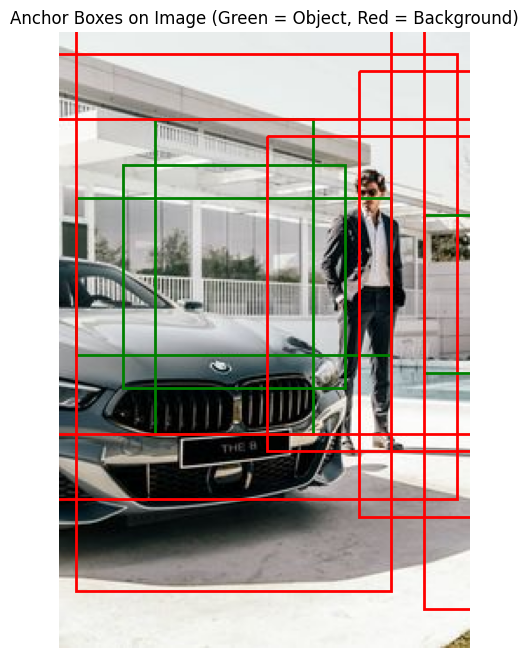

In [ ]:
# 4. Discuss the role of anchor boxes in the Region Proposal Network (RPN) of Faster R-CNN. How are anchor
# boxes used to generate region proposals.

import cv2
import numpy as np
import matplotlib.pyplot as plt
import requests

class RPNWithObjects:
    def __init__(self, scales=[128, 256], aspect_ratios=[0.5, 1, 2]):
        self.scales = scales
        self.aspect_ratios = aspect_ratios

    def generate_anchors(self, center_x, center_y):
        """
        Generate anchor boxes around the object center (center_x, center_y).
        """
        anchors = []
        for scale in self.scales:
            for ratio in self.aspect_ratios:
                # Calculate anchor size
                w = scale * np.sqrt(ratio)
                h = scale / np.sqrt(ratio)

                # Create the anchor box
                x_min = center_x - w / 2
                y_min = center_y - h / 2
                x_max = center_x + w / 2
                y_max = center_y + h / 2

                anchors.append([x_min, y_min, x_max, y_max])

        return np.array(anchors)

    def classify_anchors(self, anchors, ground_truth_boxes, iou_threshold=0.3):
        """
        Classify anchors as foreground (green) or background (red) based on IoU with ground truth.
        """
        labels = np.zeros(len(anchors), dtype=np.int32)
        for i, anchor in enumerate(anchors):
            for gt_box in ground_truth_boxes:
                iou = self.calculate_iou(anchor, gt_box)
                if iou >= iou_threshold:
                    labels[i] = 1  # Foreground (object)
        return labels

    def calculate_iou(self, box1, box2):
        """
        Calculate IoU between two boxes.
        """
        x1 = max(box1[0], box2[0])
        y1 = max(box1[1], box2[1])
        x2 = min(box1[2], box2[2])
        y2 = min(box1[3], box2[3])

        inter_area = max(0, x2 - x1) * max(0, y2 - y1)
        box1_area = (box1[2] - box1[0]) * (box1[3] - box1[1])
        box2_area = (box2[2] - box2[0]) * (box2[3] - box2[1])
        union_area = box1_area + box2_area - inter_area

        return inter_area / union_area if union_area > 0 else 0

    def visualize_anchors(self, image, anchors, labels):
        """
        Visualize anchors on the image. Green = foreground (object), Red = background.
        """
        plt.figure(figsize=(12, 8))
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

        for i, anchor in enumerate(anchors):
            x_min, y_min, x_max, y_max = anchor
            color = 'green' if labels[i] == 1 else 'red'
            plt.gca().add_patch(plt.Rectangle((x_min, y_min), x_max - x_min, y_max - y_min,
                                              fill=False, edgecolor=color, linewidth=2))

        plt.title("Anchor Boxes on Image (Green = Object, Red = Background)")
        plt.axis("off")
        plt.show()


# Load an image from a URL or fallback to a local image
image_url = "https://i.pinimg.com/236x/e0/96/59/e0965942bcd03736d4f928e7004261be.jpg"  # Replace with a valid image URL
try:
    response = requests.get(image_url)
    image = cv2.imdecode(np.frombuffer(response.content, np.uint8), cv2.IMREAD_COLOR)
    if image is None:
        raise ValueError("Image could not be loaded from URL.")
except Exception as e:
    print(f"Error loading image from URL: {e}")
    image = cv2.imread("fallback_image.jpg")  # Use a local fallback image
    if image is None:
        raise ValueError("Fallback image could not be loaded.")

# Define ground truth boxes for the objects in the image
ground_truth_boxes = [
    [50, 80, 150, 200],   # Example: Person
    [250, 100, 350, 200]  # Example: Car
]

# Create anchor boxes centered around the ground truth bounding boxes
rpn = RPNWithObjects(scales=[128, 256], aspect_ratios=[0.5, 1, 2])

anchors = []
for gt_box in ground_truth_boxes:
    center_x = (gt_box[0] + gt_box[2]) / 2  # Center x of the ground truth box
    center_y = (gt_box[1] + gt_box[3]) / 2  # Center y of the ground truth box

    # Generate anchors around this center
    anchors += list(rpn.generate_anchors(center_x, center_y))

# Classify anchors based on IoU with ground truth
labels = rpn.classify_anchors(np.array(anchors), ground_truth_boxes)

# Visualize anchors on the image
rpn.visualize_anchors(image, np.array(anchors), labels)


**Role of Anchor Boxes in the RPN of Faster R-CNN**

Anchor boxes are predefined bounding boxes of various sizes and aspect ratios that act as reference templates for detecting objects. They play a key role in the Region Proposal Network (RPN) by enabling it to generate region proposals efficiently.

**How Anchor Boxes Work:**
1. Anchor Generation:

 - At each location on the feature map, multiple anchor boxes (e.g., different scales and aspect ratios) are placed.

2. Objectness Classification:

 - The RPN predicts whether each anchor box contains an object (foreground) or not (background).

3. Bounding Box Regression:

 - The RPN refines anchor boxes by adjusting their coordinates to better fit objects.

4. Non-Maximum Suppression (NMS):

 - Redundant or overlapping anchors are suppressed to retain the top proposals.

**Importance of Anchor Boxes:**

- They allow efficient proposal generation without manual methods like Selective Search.

- Multiple scales and aspect ratios make them adaptable to objects of different sizes and shapes.
- Refined anchors serve as accurate region proposals for the Fast R-CNN head.

Setting up the COCO dataset...


Downloading: 100%|██████████| 816M/816M [00:26<00:00, 31.1MB/s]


Extracting ./coco/val2017.zip...
Extraction completed at ./coco.


Downloading: 100%|██████████| 253M/253M [00:05<00:00, 50.2MB/s]


Extracting ./coco/annotations_trainval2017.zip...
Extraction completed at ./coco.
Loading dataset and model...
loading annotations into memory...
Done (t=0.77s)
creating index...
index created!


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth
100%|██████████| 160M/160M [00:02<00:00, 66.4MB/s]


Evaluating the model...


Evaluating: 100%|██████████| 2500/2500 [11:16<00:00,  3.70it/s]


Visualizing results...


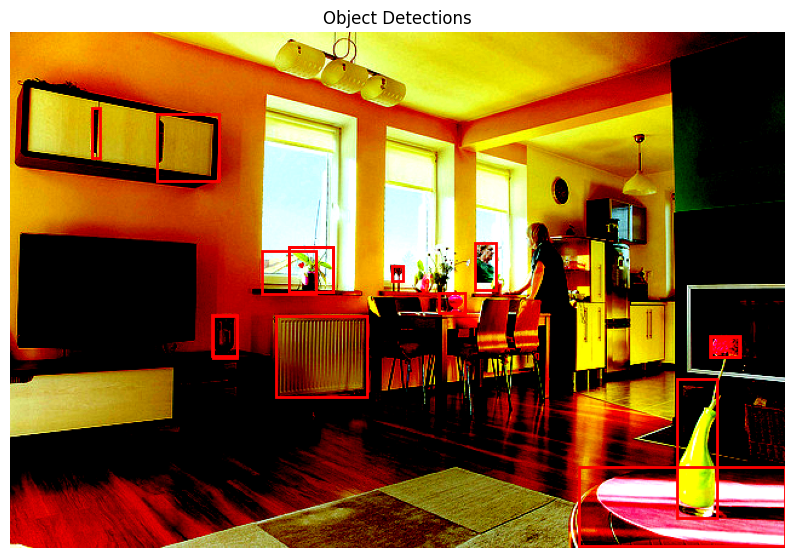

In [ ]:
# 5. Evaluate the performance of Faster R-CNN on standard object detection benchmarks such as COCO
# and Pascal VOC. Discuss its strengths, limitations, and potential areas for improvement.

import os
import zipfile
import requests
from tqdm import tqdm
import torch
from torchvision import models, transforms
from torchvision.datasets import CocoDetection
from torch.utils.data import DataLoader
from PIL import Image
import matplotlib.pyplot as plt

# Function to download and unzip dataset
def download_and_extract(url, output_path, extract_path):
    if not os.path.exists(output_path):
        print(f"Downloading {url.split('/')[-1]}...")
        response = requests.get(url, stream=True)
        with open(output_path, "wb") as f:
            total = int(response.headers.get('content-length', 0))
            with tqdm(total=total, unit='B', unit_scale=True, desc="Downloading") as progress_bar:
                for data in response.iter_content(chunk_size=1024):
                    f.write(data)
                    progress_bar.update(len(data))
    else:
        print(f"{output_path} already exists.")

    print(f"Extracting {output_path}...")
    with zipfile.ZipFile(output_path, "r") as zip_ref:
        zip_ref.extractall(extract_path)
    print(f"Extraction completed at {extract_path}.")

# Setup the COCO dataset
def setup_coco_dataset():
    base_path = "./coco"
    os.makedirs(base_path, exist_ok=True)

    # URLs for COCO data
    val_images_url = "http://images.cocodataset.org/zips/val2017.zip"
    annotations_url = "http://images.cocodataset.org/annotations/annotations_trainval2017.zip"

    # Paths
    val_images_zip = os.path.join(base_path, "val2017.zip")
    annotations_zip = os.path.join(base_path, "annotations_trainval2017.zip")
    val_images_path = os.path.join(base_path, "val2017")
    annotations_path = os.path.join(base_path, "annotations")

    # Download and extract
    download_and_extract(val_images_url, val_images_zip, base_path)
    download_and_extract(annotations_url, annotations_zip, base_path)

    return val_images_path, os.path.join(annotations_path, "instances_val2017.json")

# Load the COCO dataset
def load_coco_dataset(data_dir, annotation_file):
    transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])
    dataset = CocoDetection(root=data_dir, annFile=annotation_file, transform=transform)
    return dataset

# Load pre-trained Faster R-CNN model
def load_faster_rcnn():
    model = models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
    model.eval()
    return model

# Evaluate the model on the COCO dataset
def evaluate_model(model, dataloader, device):
    model.to(device)
    results = []
    with torch.no_grad():
        for images, targets in tqdm(dataloader, desc="Evaluating"):
            # Move images to GPU
            images = [img.to(device) for img in images]
            outputs = model(images)
            results.append(outputs)
    return results

# Visualize the results
def visualize_results(image, predictions):
    plt.figure(figsize=(10, 10))
    plt.imshow(image)

    # Plot bounding boxes
    for box in predictions['boxes']:
        x_min, y_min, x_max, y_max = box.cpu().numpy()  # Move tensor to CPU before converting to numpy
        rect = plt.Rectangle((x_min, y_min), x_max - x_min, y_max - y_min,
                             edgecolor='red', facecolor='none', linewidth=2)
        plt.gca().add_patch(rect)

    plt.axis('off')
    plt.title("Object Detections")
    plt.show()

# Main function
def main():
    # Step 1: Setup COCO dataset
    print("Setting up the COCO dataset...")
    data_dir, annotation_file = setup_coco_dataset()

    # Step 2: Load dataset and model
    print("Loading dataset and model...")
    coco_dataset = load_coco_dataset(data_dir, annotation_file)
    dataloader = DataLoader(coco_dataset, batch_size=2, shuffle=False, collate_fn=lambda x: tuple(zip(*x)))

    model = load_faster_rcnn()

    # Step 3: Evaluate the model
    print("Evaluating the model...")
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    results = evaluate_model(model, dataloader, device)

    # Step 4: Visualize the first image with predictions
    print("Visualizing results...")
    image, target = coco_dataset[0]
    image = image.permute(1, 2, 0).numpy()  # Convert to HWC format for visualization
    predictions = results[0][0]
    visualize_results(image, predictions)

if __name__ == "__main__":
    main()



**Evaluation of Faster R-CNN on Standard Object Detection Benchmarks (COCO and Pascal VOC)**

Faster R-CNN is a widely used and high-performing object detection model evaluated on benchmarks such as COCO and Pascal VOC. Here's an overview of its performance, strengths, limitations, and areas for improvement.

1. Performance on COCO and Pascal VOC

- 1.Pascal VOC:

 - Faster R-CNN achieves high accuracy on the Pascal VOC dataset, with mean Average Precision (mAP) scores around 70-80% depending on the implementation and backbone used (e.g., ResNet or VGG).

 - It excels in detecting medium and large-sized objects with fewer occlusions.

- 2.COCO:

 - Faster R-CNN performs well on COCO but faces challenges due to the dataset's complexity (e.g., dense objects, small object sizes).

 - It achieves mAP@[.5:.95] scores around 35-40%, varying based on the backbone and training configuration.
2. Strengths

- High Accuracy: Faster R-CNN provides precise bounding boxes and high detection accuracy, particularly for medium to large objects.

- Scalable Backbone: Supports modern backbones (e.g., ResNet, ResNeXt) to boost feature extraction quality.

- Versatility: Performs well on a variety of datasets, including dense scenes with multiple objects.

3. Limitations

- Slow Inference: Faster R-CNN is computationally expensive compared to single-stage detectors like YOLO or SSD, making it less suitable for real-time applications.
- Poor Small Object Detection: It struggles with detecting small objects, especially on COCO, due to anchor box design and feature resolution.

- Memory Consumption: The model is resource-intensive, requiring powerful GPUs for training and inference.

4. Potential Areas for Improvement

- Real-time Performance: Speed up the RPN and classification head with lightweight architectures.

- Small Object Detection: Use higher-resolution feature maps (e.g., FPN) or anchor box scaling for improved small object detection.

- Augmented Training Data: Data augmentation techniques like mosaic augmentation could enhance robustness.

- Post-Processing: Enhanced post-processing techniques (e.g., dynamic NMS) can improve detection in crowded scenes.
